### Análisis de un dataset de kickstarter ###

Pandas avanzado

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
projects_2017 = pd.read_csv('kickstarter-projects/ks-projects-201801.csv')
projects_2017.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,"50,000.00",2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,"50,000.00"
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,"1,500.00",2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,"1,500.00"
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,"15,000.00",2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,"15,000.00"
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,"15,000.00",2016-01-13 18:13:53,200.00,failed,6,US,200.00,200.00,"15,000.00"
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,"2,000.00",2011-07-19 09:07:47,524.00,failed,17,US,524.00,524.00,"2,000.00"


In [3]:
print(projects_2017.shape)

(378661, 15)


In [4]:
projects_2017.size

5679915

In [5]:
projects_2017.count()

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [6]:
type(projects_2017['usd pledged'].count())

numpy.int64

Propiedades del set de datos

In [7]:
main_categories = projects_2017['main_category']

In [8]:
type(main_categories)

pandas.core.series.Series

In [9]:
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [10]:
states = projects_2017['state']

In [11]:
states.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [12]:
projects_2017['launched'].head()

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object

Transformar launched a formato fecha

In [13]:
projects_2017['launched_datetime'] = pd.to_datetime(projects_2017['launched'])
# Genero columna de año de creacion
projects_2017['year'] = projects_2017['launched_datetime'].dt.year

In [14]:
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
ID                   378661 non-null int64
name                 378657 non-null object
category             378661 non-null object
main_category        378661 non-null object
currency             378661 non-null object
deadline             378661 non-null object
goal                 378661 non-null float64
launched             378661 non-null object
pledged              378661 non-null float64
state                378661 non-null object
backers              378661 non-null int64
country              378661 non-null object
usd pledged          374864 non-null float64
usd_pledged_real     378661 non-null float64
usd_goal_real        378661 non-null float64
launched_datetime    378661 non-null datetime64[ns]
year                 378661 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 49.1+ MB


In [15]:
projects_2017['year'].value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

* Análisis de uso de memoria

In [16]:
projects_2017.dtypes

ID                            int64
name                         object
category                     object
main_category                object
currency                     object
deadline                     object
goal                        float64
launched                     object
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
launched_datetime    datetime64[ns]
year                          int64
dtype: object

In [17]:
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
ID                   378661 non-null int64
name                 378657 non-null object
category             378661 non-null object
main_category        378661 non-null object
currency             378661 non-null object
deadline             378661 non-null object
goal                 378661 non-null float64
launched             378661 non-null object
pledged              378661 non-null float64
state                378661 non-null object
backers              378661 non-null int64
country              378661 non-null object
usd pledged          374864 non-null float64
usd_pledged_real     378661 non-null float64
usd_goal_real        378661 non-null float64
launched_datetime    378661 non-null datetime64[ns]
year                 378661 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 49.1+ MB


In [18]:
# Memoria en mb
(projects_2017.memory_usage() / (1024 * 1024)).sum()

49.112297058105469

Conversión de datos y mejoras en uso de memoria

In [19]:
# Asignamos a main_categories como tipo categórico
main_categories.astype('category').dtypes

CategoricalDtype(categories=['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
                  'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
                  'Photography', 'Publishing', 'Technology', 'Theater'],
                 ordered=False)

In [20]:
projects_2017.astype({'main_category':'category'}).memory_usage()

Index                     80
ID                   3029288
name                 3029288
category             3029288
main_category         379421
currency             3029288
deadline             3029288
goal                 3029288
launched             3029288
pledged              3029288
state                3029288
backers              3029288
country              3029288
usd pledged          3029288
usd_pledged_real     3029288
usd_goal_real        3029288
launched_datetime    3029288
year                 3029288
dtype: int64

Indicar un datatype al momento de leer el csv

In [21]:
projects = pd.read_csv('kickstarter-projects/ks-projects-201801.csv', dtype={'main_category':'category', 'category':'category', 'country':'category'})

In [22]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null category
main_category       378661 non-null category
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null category
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: category(3), float64(5), int64(2), object(5)
memory usage: 36.1+ MB


In [23]:
projects.memory_usage()

Index                    80
ID                  3029288
name                3029288
category             763714
main_category        379421
currency            3029288
deadline            3029288
goal                3029288
launched            3029288
pledged             3029288
state               3029288
backers             3029288
country              379485
usd pledged         3029288
usd_pledged_real    3029288
usd_goal_real       3029288
dtype: int64

In [24]:
# Seleccionar columnas de tipo numérico
projects.select_dtypes('number').head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,"1,000.00",0.00,0,0.00,0.00,"1,533.95"
1,1000003930,"30,000.00","2,421.00",15,100.00,"2,421.00","30,000.00"
2,1000004038,"45,000.00",220.00,3,220.00,220.00,"45,000.00"
3,1000007540,"5,000.00",1.00,1,1.00,1.00,"5,000.00"
4,1000011046,"19,500.00","1,283.00",14,"1,283.00","1,283.00","19,500.00"


In [25]:
# Seleccionar columnas de tipo categórico
projects.select_dtypes('category').head()

,category,main_category,country
0,Poetry,Publishing,GB
1,Narrative Film,Film & Video,US
2,Narrative Film,Film & Video,US
3,Music,Music,US
4,Film & Video,Film & Video,US


In [26]:
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [27]:
counts = main_categories.value_counts().tolist()
print(counts)
print(type(counts))

[63585, 51918, 39874, 35231, 32569, 30070, 28153, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768]
<class 'list'>


In [28]:
main_categories.value_counts().index

Index(['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Design',
       'Art', 'Food', 'Fashion', 'Theater', 'Comics', 'Photography', 'Crafts',
       'Journalism', 'Dance'],
      dtype='object')

In [29]:
main_categories.to_frame()

,main_category
0,Publishing
1,Film & Video
2,Film & Video
3,Music
4,Film & Video
5,Food
6,Food
7,Food
8,Design
9,Film & Video


#### Stack & Unstack ####

In [30]:
projects_by_main_category = projects_2017.groupby('main_category').agg({'backers':['mean', 'sum'], 'pledged':'mean', 'goal':'mean', 'category':'count'})

In [31]:
projects_by_main_category.head(10)

backers                        pledged  \
                              mean       sum                 mean   
main_category                                                       
Art                          42.21   1188200             3,606.97   
Comics                      134.77   1458090             6,899.31   
Crafts                       27.28    240342             2,016.15   
Dance                        42.80    161275             3,690.80   
Design                      241.30   7255880            27,119.75   
Fashion                      61.45   1401993             6,549.03   
Film & Video                 66.02   4197577             6,362.73   
Food                         54.17   1332751             5,340.16   
Games                       321.79  11336829            21,865.17   
Journalism                   38.29    182091             3,218.09   

                              goal category  
                              mean    count  
main_category                                
Art                      40,829.18    28153  
Comics                   20,243.65    10819  
Crafts                   11,592.29     8809  
Dance                    10,321.33     3768  
Design                   46,733.63    30070  
Fashion                  24,818.25    22816  
Film & Video             84,334.01    63585  
Food                     48,693.75    24602  
Games                    50,711.30    35231  
Journalism               88,783.58     4755

In [32]:
projects_by_main_category.stack()

backers              pledged  \
main_category                                                   
Art           count                  nan                  nan   
              mean                 42.21             3,606.97   
              sum           1,188,200.00                  nan   
Comics        count                  nan                  nan   
              mean                134.77             6,899.31   
              sum           1,458,090.00                  nan   
Crafts        count                  nan                  nan   
              mean                 27.28             2,016.15   
              sum             240,342.00                  nan   
Dance         count                  nan                  nan   
              mean                 42.80             3,690.80   
              sum             161,275.00                  nan   
Design        count                  nan                  nan   
              mean                241.30            27,119.75   
              sum           7,255,880.00                  nan   
Fashion       count                  nan                  nan   
              mean                 61.45             6,549.03   
              sum           1,401,993.00                  nan   
Film & Video  count                  nan                  nan   
              mean                 66.02             6,362.73   
              sum           4,197,577.00                  nan   
Food          count                  nan                  nan   
              mean                 54.17             5,340.16   
              sum           1,332,751.00                  nan   
Games         count                  nan                  nan   
              mean                321.79            21,865.17   
              sum          11,336,829.00                  nan   
Journalism    count                  nan                  nan   
              mean                 38.29             3,218.09   
              sum             182,091.00                  nan   
Music         count                  nan                  nan   
              mean                 52.17             3,992.74   
              sum           2,708,475.00                  nan   
Photography   count                  nan                  nan   
              mean                 39.71             3,664.65   
              sum             428,078.00                  nan   
Publishing    count                  nan                  nan   
              mean                 55.97             3,638.72   
              sum           2,231,589.00                  nan   
Technology    count                  nan                  nan   
              mean                164.47            22,586.16   
              sum           5,356,513.00                  nan   
Theater       count                  nan                  nan   
              mean                 47.06             4,097.22   
              sum             513,536.00                  nan   

                                    goal             category  
main_category                                                  
Art           count                  nan            28,153.00  
              mean             40,829.18                  nan  
              sum                    nan                  nan  
Comics        count                  nan            10,819.00  
              mean             20,243.65                  nan  
              sum                    nan                  nan  
Crafts        count                  nan             8,809.00  
              mean             11,592.29                  nan  
              sum                    nan                  nan  
Dance         count                  nan             3,768.00  
              mean             10,321.33                  nan  
              sum                    nan                  nan  
Design        count                  nan            30,070.00  
              mea

In [33]:
# Renombro columnas
projects_by_main_category.columns = ['backers_mean', 'backers_total', 'pledged_mean', 'goal_mean', 'projects_total']
projects_by_main_category.head()

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,1188200,"3,606.97","40,829.18",28153
Comics,134.77,1458090,"6,899.31","20,243.65",10819
Crafts,27.28,240342,"2,016.15","11,592.29",8809
Dance,42.80,161275,"3,690.80","10,321.33",3768
Design,241.30,7255880,"27,119.75","46,733.63",30070


In [34]:
stacked = projects_by_main_category.stack()
stacked.head()

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
dtype: float64

In [35]:
stacked.unstack()

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","3,606.97","40,829.18","28,153.00"
Comics,134.77,"1,458,090.00","6,899.31","20,243.65","10,819.00"
Crafts,27.28,"240,342.00","2,016.15","11,592.29","8,809.00"
Dance,42.80,"161,275.00","3,690.80","10,321.33","3,768.00"
Design,241.30,"7,255,880.00","27,119.75","46,733.63","30,070.00"
Fashion,61.45,"1,401,993.00","6,549.03","24,818.25","22,816.00"
Film & Video,66.02,"4,197,577.00","6,362.73","84,334.01","63,585.00"
Food,54.17,"1,332,751.00","5,340.16","48,693.75","24,602.00"
Games,321.79,"11,336,829.00","21,865.17","50,711.30","35,231.00"


In [36]:
projects_by_main_category_reshaped = projects_by_main_category.stack()
projects_by_main_category_reshaped.head(10)

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
Comics         backers_mean                   134.77
               backers_total            1,458,090.00
               pledged_mean                 6,899.31
               goal_mean                   20,243.65
               projects_total              10,819.00
dtype: float64

In [37]:
projects_by_main_category_reshaped = projects_by_main_category_reshaped.reset_index()

In [38]:
projects_by_main_category_reshaped.head(10)

,main_category,level_1,0
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
5,Comics,backers_mean,134.77
6,Comics,backers_total,"1,458,090.00"
7,Comics,pledged_mean,"6,899.31"
8,Comics,goal_mean,"20,243.65"
9,Comics,projects_total,"10,819.00"


In [39]:
projects_by_main_category_reshaped.columns = ['main_category', 'statistics', 'values']
projects_by_main_category_reshaped.head(10)

,main_category,statistics,values
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
5,Comics,backers_mean,134.77
6,Comics,backers_total,"1,458,090.00"
7,Comics,pledged_mean,"6,899.31"
8,Comics,goal_mean,"20,243.65"
9,Comics,projects_total,"10,819.00"


#### Unstack ####

In [42]:
projects_by_main_category_stacked = projects_by_main_category.stack()
projects_by_main_category_stacked.head(10)

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
Comics         backers_mean                   134.77
               backers_total            1,458,090.00
               pledged_mean                 6,899.31
               goal_mean                   20,243.65
               projects_total              10,819.00
dtype: float64

In [43]:
# Por default toma el nivel mas interno del multi índice, en este caso statistics
projects_by_main_category_stacked.unstack()

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","3,606.97","40,829.18","28,153.00"
Comics,134.77,"1,458,090.00","6,899.31","20,243.65","10,819.00"
Crafts,27.28,"240,342.00","2,016.15","11,592.29","8,809.00"
Dance,42.80,"161,275.00","3,690.80","10,321.33","3,768.00"
Design,241.30,"7,255,880.00","27,119.75","46,733.63","30,070.00"
Fashion,61.45,"1,401,993.00","6,549.03","24,818.25","22,816.00"
Film & Video,66.02,"4,197,577.00","6,362.73","84,334.01","63,585.00"
Food,54.17,"1,332,751.00","5,340.16","48,693.75","24,602.00"
Games,321.79,"11,336,829.00","21,865.17","50,711.30","35,231.00"


In [44]:
projects_by_main_category_stacked.head(10)

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
Comics         backers_mean                   134.77
               backers_total            1,458,090.00
               pledged_mean                 6,899.31
               goal_mean                   20,243.65
               projects_total              10,819.00
dtype: float64

In [45]:
# Si indicamos el numemero de nivel de multi índice
projects_by_main_category_stacked.unstack(0)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,42.21,134.77,27.28,42.80,241.30,61.45,66.02,54.17,321.79,38.29,52.17,39.71,55.97,164.47,47.06
backers_total,"1,188,200.00","1,458,090.00","240,342.00","161,275.00","7,255,880.00","1,401,993.00","4,197,577.00","1,332,751.00","11,336,829.00","182,091.00","2,708,475.00","428,078.00","2,231,589.00","5,356,513.00","513,536.00"
pledged_mean,"3,606.97","6,899.31","2,016.15","3,690.80","27,119.75","6,549.03","6,362.73","5,340.16","21,865.17","3,218.09","3,992.74","3,664.65","3,638.72","22,586.16","4,097.22"
goal_mean,"40,829.18","20,243.65","11,592.29","10,321.33","46,733.63","24,818.25","84,334.01","48,693.75","50,711.30","88,783.58","16,056.36","13,003.23","29,131.46","119,712.32","27,542.35"
projects_total,"28,153.00","10,819.00","8,809.00","3,768.00","30,070.00","22,816.00","63,585.00","24,602.00","35,231.00","4,755.00","51,918.00","10,779.00","39,874.00","32,569.00","10,913.00"


In [46]:
# Equivalente a trasponer 
projects_by_main_category.T

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,42.21,134.77,27.28,42.80,241.30,61.45,66.02,54.17,321.79,38.29,52.17,39.71,55.97,164.47,47.06
backers_total,"1,188,200.00","1,458,090.00","240,342.00","161,275.00","7,255,880.00","1,401,993.00","4,197,577.00","1,332,751.00","11,336,829.00","182,091.00","2,708,475.00","428,078.00","2,231,589.00","5,356,513.00","513,536.00"
pledged_mean,"3,606.97","6,899.31","2,016.15","3,690.80","27,119.75","6,549.03","6,362.73","5,340.16","21,865.17","3,218.09","3,992.74","3,664.65","3,638.72","22,586.16","4,097.22"
goal_mean,"40,829.18","20,243.65","11,592.29","10,321.33","46,733.63","24,818.25","84,334.01","48,693.75","50,711.30","88,783.58","16,056.36","13,003.23","29,131.46","119,712.32","27,542.35"
projects_total,"28,153.00","10,819.00","8,809.00","3,768.00","30,070.00","22,816.00","63,585.00","24,602.00","35,231.00","4,755.00","51,918.00","10,779.00","39,874.00","32,569.00","10,913.00"


#### Pivot & Pivot Table ####

Pivot lanza ValueErro en caso de duplicados, pivot_table resuelve esto con una función de agregación que se puede indicar como:

`df.pivot_table(index='item', columns='column', values='val', aggfunc=np.mean)`

In [47]:
projects_by_main_category_reshaped.columns

Index(['main_category', 'statistics', 'values'], dtype='object')

In [48]:
projects_by_main_category_reshaped.head(10)

,main_category,statistics,values
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
5,Comics,backers_mean,134.77
6,Comics,backers_total,"1,458,090.00"
7,Comics,pledged_mean,"6,899.31"
8,Comics,goal_mean,"20,243.65"
9,Comics,projects_total,"10,819.00"


In [49]:
projects_by_main_category_reshaped.pivot(index='main_category', columns='statistics', values='values')

statistics,backers_mean,backers_total,goal_mean,pledged_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","40,829.18","3,606.97","28,153.00"
Comics,134.77,"1,458,090.00","20,243.65","6,899.31","10,819.00"
Crafts,27.28,"240,342.00","11,592.29","2,016.15","8,809.00"
Dance,42.80,"161,275.00","10,321.33","3,690.80","3,768.00"
Design,241.30,"7,255,880.00","46,733.63","27,119.75","30,070.00"
Fashion,61.45,"1,401,993.00","24,818.25","6,549.03","22,816.00"
Film & Video,66.02,"4,197,577.00","84,334.01","6,362.73","63,585.00"
Food,54.17,"1,332,751.00","48,693.75","5,340.16","24,602.00"
Games,321.79,"11,336,829.00","50,711.30","21,865.17","35,231.00"


In [50]:
# No necesitamos agregar funciones de agregación en este caso
projects_by_main_category_reshaped.pivot_table(index='main_category', columns='statistics', values='values')

statistics,backers_mean,backers_total,goal_mean,pledged_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","40,829.18","3,606.97","28,153.00"
Comics,134.77,"1,458,090.00","20,243.65","6,899.31","10,819.00"
Crafts,27.28,"240,342.00","11,592.29","2,016.15","8,809.00"
Dance,42.80,"161,275.00","10,321.33","3,690.80","3,768.00"
Design,241.30,"7,255,880.00","46,733.63","27,119.75","30,070.00"
Fashion,61.45,"1,401,993.00","24,818.25","6,549.03","22,816.00"
Film & Video,66.02,"4,197,577.00","84,334.01","6,362.73","63,585.00"
Food,54.17,"1,332,751.00","48,693.75","5,340.16","24,602.00"
Games,321.79,"11,336,829.00","50,711.30","21,865.17","35,231.00"


Caso con valores duplicados, visualización de la tabla con un heatmap

In [51]:
# Agrego columnas de año y mes de lanzamiento de un proyecto
projects_2017['launched'] = pd.to_datetime(projects_2017['launched'])
projects_2017['launch_month'] = pd.to_datetime(projects_2017['launched']).dt.month
projects_2017['launched_year'] = pd.to_datetime(projects_2017['launched']).dt.year

In [53]:
# Agrego columnas que generen duplicados
projects_2017['active_project'] = 1
for_heatmap = projects_2017.pivot_table(index='launched_year', columns='launch_month', values='active_project', aggfunc='sum')

In [54]:
for_heatmap.head(10)

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launched_year,,,,,,,,,,,,
1970,7.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009,nan,nan,nan,19.00,74.00,75.00,78.00,115.00,348.00,194.00,218.00,208.00
2010,296.00,371.00,511.00,678.00,760.00,"1,093.00","1,067.00",967.00,"1,028.00","1,210.00","1,272.00","1,266.00"
2011,"1,594.00","1,803.00","2,025.00","2,243.00","2,288.00","2,294.00","2,368.00","2,320.00","2,151.00","2,311.00","2,612.00","2,228.00"
2012,"2,903.00","3,358.00","4,049.00","3,773.00","3,962.00","3,927.00","3,664.00","3,521.00","3,042.00","3,481.00","3,180.00","2,305.00"
2013,"3,296.00","3,359.00","3,845.00","3,991.00","4,208.00","3,853.00","3,877.00","3,514.00","3,699.00","4,097.00","4,196.00","2,916.00"
2014,"3,475.00","3,817.00","4,463.00","4,483.00","4,641.00","5,089.00","10,775.00","7,430.00","6,383.00","6,860.00","6,083.00","4,246.00"
2015,"6,669.00","7,591.00","8,144.00","7,470.00","6,970.00","6,883.00","6,011.00","5,723.00","5,959.00","5,925.00","5,884.00","4,071.00"
2016,"5,026.00","5,406.00","5,659.00","5,222.00","5,181.00","4,905.00","4,308.00","4,346.00","4,359.00","4,720.00","4,779.00","3,273.00"


Heatmap: Representa en el eje Y todos los puntos(años) y en el eje X cada categoria posible (meses).

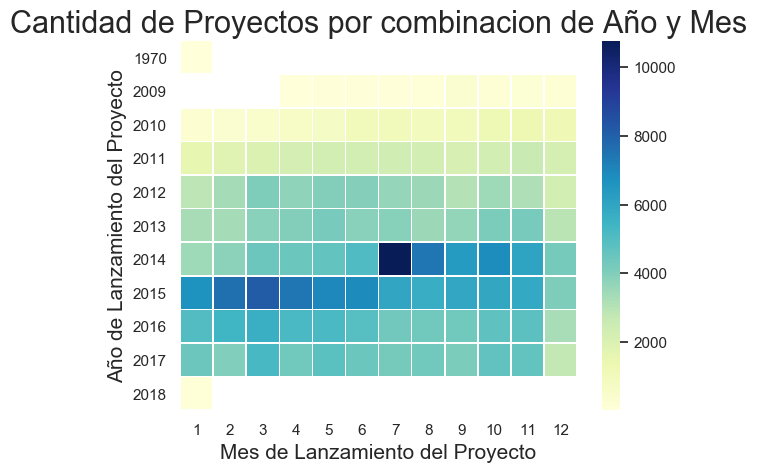

In [55]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)